(feature-overview)=

# Feature overview

The following presents a descriptive example show-casing all core features of GeoUtils.

For more details, refer to the {ref}`core-index`, {ref}`rasters-index` or {ref}`vectors-index` pages.

```{tip}
All pages of this documentation containing code cells can be **run interactively online without the need of setting up your own environment**. Simply click the top launch button!
(MyBinder can be a bit capricious: you might have to be patient, or restart it after the build is done the first time 😅)

Alternatively, start your own notebook to test GeoUtils at [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/GlacioHack/geoutils/main).
```

## The core {class}`~geoutils.Raster` and {class}`~geoutils.Vector` classes

In GeoUtils, geospatial handling is object-based and revolves around {class}`~geoutils.Raster` and {class}`~geoutils.Vector`.
These link to either **on-disk** or **in-memory** datasets, opened by calling the object with a file path.

In [1]:
import geoutils as gu

# Examples files: infrared band of Landsat and glacier outlines
filename_rast = gu.examples.get_path("everest_landsat_b4")
filename_vect = gu.examples.get_path("everest_rgi_outlines")

# Open files by calling Raster and Vector
rast = gu.Raster(filename_rast)
vect = gu.Vector(filename_vect)

A {class}`~geoutils.Raster` is an object with four main attributes: a {class}`numpy.ma.MaskedArray` as {attr}`~geoutils.Raster.data`, a
{class}`pyproj.crs.CRS` as {attr}`~geoutils.Raster.crs`, an [{class}`affine.Affine`](https://rasterio.readthedocs.io/en/stable/topics/migrating-to-v1.html#affine-affine-vs-gdal-style-geotransforms)
as {attr}`~geoutils.Raster.transform`, and a {class}`float` or {class}`int` as {attr}`~geoutils.Raster.nodata`.

In [2]:
# The opened raster
rast

Raster(
  data=not_loaded; shape on disk (1, 655, 800); will load (655, 800)
  transform=| 30.00, 0.00, 478000.00|
            | 0.00,-30.00, 3108140.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:32645
  nodata=None)

```{important}
When a file exists on disk, {class}`~geoutils.Raster` is linked to a {class}`rasterio.io.DatasetReader` object for loading the metadata. The array will be
**loaded in-memory implicitly** when {attr}`~geoutils.Raster.data` is required by an operation.

See {ref}`core-lazy-load` for more details.
```

A {class}`~geoutils.Vector` is an object with a single main attribute: a {class}`~geopandas.GeoDataFrame` as {attr}`~geoutils.Vector.ds`, for which
most methods are wrapped directly into {class}`~geoutils.Vector`.

In [3]:
# The opened vector
vect

Vector(
  ds=             RGIId         GLIMSId   BgnDate   EndDate     CenLon     CenLat  \
       0   RGI60-15.03410  G086932E27925N  20001030  -9999999  86.932083  27.924758   
       1   RGI60-15.03411  G086939E27924N  20001030  -9999999  86.939035  27.923919   
       2   RGI60-15.03412  G086852E27949N  20001030  -9999999  86.851810  27.948727   
       3   RGI60-15.03413  G086848E27952N  20001030  -9999999  86.848051  27.951937   
       4   RGI60-15.03414  G086849E27966N  20001030  -9999999  86.848799  27.966443   
       ..             ...             ...       ...       ...        ...        ...   
       81  RGI60-15.10070  G086956E28089N  20100409  -9999999  86.956000  28.089000   
       82  RGI60-15.10075  G086960E28045N  20100409  -9999999  86.960000  28.045000   
       83  RGI60-15.10077  G086963E28079N  20100409  -9999999  86.963000  28.079000   
       84  RGI60-15.10078  G086966E28051N  20100409  -9999999  86.966000  28.051000   
       85  RGI60-15.10079  G086969E28097N  20100409  -9999999  86.969000  28.097000   
       
          O1Region O2Region    Area  Zmin  ...  Aspect  Lmax  Status  Connect  Form  \
       0        15        2   0.980  5196  ...     310  1184       0        0     0   
       1        15        2   0.064  5831  ...      78   309       0        0     0   
       2        15        2   0.059  5509  ...      29   269       0        0     0   
       3        15        2   0.176  5400  ...     341   790       0        0     0   
       4        15        2   0.477  5280  ...     284   845       0        0     0   
       ..      ...      ...     ...   ...  ...     ...   ...     ...      ...   ...   
       81       15        2  12.646  5940  ...     266  5413       0        0     1   
       82       15        2   0.143  6530  ...     262   426       0        0     0   
       83       15        2   0.051  6420  ...     307   395       0        0     0   
       84       15        2   0.181  6559  ...     321   461       0        0     0   
       85       15        2   0.136  6538  ...     203   571       0        0     0   
       
           TermType  Surging  Linkages                               Name  \
       0          0        9         9                               None   
       1          0        9         9                               None   
       2          0        9         9                               None   
       3          0        9         9                               None   
       4          0        9         9                               None   
       ..       ...      ...       ...                                ...   
       81         0        9         9  CN5O193B0118 East Rongbuk Glacier   
       82         0        9         9  CN5O193B0118 East Rongbuk Glacier   
       83         0        9         9  CN5O193B0118 East Rongbuk Glacier   
       84         0        9         9  CN5O193B0118 East Rongbuk Glacier   
       85         0        9         9  CN5O193B0118 East Rongbuk Glacier   
       
                                                    geometry  
       0   POLYGON ((86.92842 27.92877, 86.92866 27.92930...  
       1   POLYGON ((86.94077 27.92375, 86.94059 27.92295...  
       2   POLYGON ((86.85344 27.94752, 86.85340 27.94752...  
       3   POLYGON ((86.84776 27.94845, 86.84776 27.94849...  
       4   POLYGON ((86.84567 27.96906, 86.84567 27.96910...  
       ..                                                ...  
       81  POLYGON ((86.94112 28.11455, 86.94129 28.11452...  
       82  POLYGON ((86.95861 28.04669, 86.95847 28.04701...  
       83  POLYGON ((86.96454 28.07843, 86.96445 28.07814...  
       84  POLYGON ((86.96302 28.04915, 86.96304 28.04920...  
       85  POLYGON ((86.97074 28.09496, 86.97039 28.09488...  
       
       [86 rows x 23 columns]
  crs=EPSG:4326
  bounds=BoundingBox(left=86.70393205700003, bottom=27.847778695000045, right=87.11409458600008, top=28.14549759700003))

All other attributes are derivatives of those main attributes, or of the filename on disk. Attributes of {class}`~geoutils.Raster` and
{class}`~geoutils.Vector` update with geospatial operations on themselves.


## Handling and match-reference

In GeoUtils, geospatial handling operations are based on class methods, such as {func}`~geoutils.Raster.crop` or {func}`~geoutils.Raster.reproject`.

For convenience and consistency, nearly all of these methods can be passed solely another {class}`~geoutils.Raster` or {class}`~geoutils.Vector` as a
**reference to match** during the operation. A **reference {class}`~geoutils.Vector`** enforces a matching of {attr}`~geoutils.Vector.bounds` and/or
{attr}`~geoutils.Vector.crs`, while a **reference {class}`~geoutils.Raster`** can also enforce a matching of {attr}`~geoutils.Raster.res`, depending on the nature of the operation.

In [4]:
# Print initial bounds of the vector
print(vect.bounds)
# Crop vector to raster's extent, and add clipping option (otherwise keeps all intersecting features)
vect_cropped = vect.crop(rast, clip=True)
# Print bounds of cropped + clipped vector
print(vect_cropped.bounds)

BoundingBox(left=86.70393205700003, bottom=27.847778695000045, right=87.11409458600008, top=28.14549759700003)
BoundingBox(left=86.77604281922927, bottom=27.921168931302088, right=87.02035980673882, top=28.098736524870052)


```{margin}
<sup>1</sup>The names of geospatial handling methods is largely based on [GDAL and OGR](https://gdal.org/)'s, with the notable exception of {func}`~geoutils.Vector.reproject` that better applies to vectors than `warp`.
```

Additionally, in GeoUtils, **methods that apply to the same georeferencing attributes have consistent naming**<sup>1</sup> across {class}`~geoutils.Raster` and {class}`~geoutils.Vector`.

A {func}`~geoutils.Raster.reproject` involves a change in {attr}`~geoutils.Raster.crs` or {attr}`~geoutils.Raster.transform`, while a {func}`~geoutils.Raster.crop` only involves a change
in {attr}`~geoutils.Raster.bounds`. Using {func}`~geoutils.Raster.polygonize` allows to generate a {class}`~geoutils.Vector` from a {class}`~geoutils.Raster`,
and the other way around for {func}`~geoutils.Vector.rasterize`.

```{list-table}
   :widths: 30 30 30
   :header-rows: 1

   * - **Class**
     - {class}`~geoutils.Raster`
     - {class}`~geoutils.Vector`
   * - Warping/Reprojection
     - {func}`~geoutils.Raster.reproject`
     - {func}`~geoutils.Vector.reproject`
   * - Cropping/Clipping
     - {func}`~geoutils.Raster.crop`
     - {func}`~geoutils.Vector.crop`
   * - Rasterize/Polygonize
     - {func}`~geoutils.Raster.polygonize`
     - {func}`~geoutils.Vector.rasterize`
```

All methods can also be passed any number of georeferencing arguments such as {attr}`~geoutils.Raster.shape` or {attr}`~geoutils.Raster.res`, and will
naturally deduce others from the input {class}`~geoutils.Raster` or {class}`~geoutils.Vector`, much as in [GDAL](https://gdal.org/)'s command line.


## Higher-level analysis tools

GeoUtils also implements higher-level geospatial analysis tools for both {class}`Rasters<geoutils.Raster>` and {class}`Vectors<geoutils.Vector>`. For
example, one can compute the distance to a {class}`~geoutils.Vector` geometry, or to target pixels of a {class}`~geoutils.Raster`, using
{func}`~geoutils.Vector.proximity`.

As with the geospatial handling functions previously listed, many analysis functions can take a {class}`~geoutils.Raster` or {class}`~geoutils.Vector` as a
**reference to utilize** during the operation. In the case of {func}`~geoutils.Vector.proximity`, passing a {class}`~geoutils.Raster` serves as a reference
for the georeferenced grid on which to compute the distances.

In [5]:
# Compute proximity to vector on raster's grid
rast_proximity_to_vec = vect.proximity(rast)

```{note}
Right now, the array {attr}`~geoutils.Raster.data` of `rast` is still not loaded. Applying {func}`~geoutils.Raster.crop` does not yet require loading,
and `rast`'s metadata is sufficient to provide a georeferenced grid for {func}`~geoutils.Vector.proximity`. The array will only be loaded when necessary.
```

## Quick plotting

To facilitate the analysis process, GeoUtils includes quick plotting tools that support multiple colorbars and implicitly add layers to the current axis.
Those are build on top of {func}`rasterio.plot.show` and {func}`geopandas.GeoDataFrame.plot`, and relay any argument passed.

```{seealso}
GeoUtils' plotting tools only aim to smooth out the most common hassles when quickly plotting raster and vectors.

For advanced plotting tools to create "publication-quality" figures, see [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) or
[GeoPlot](https://residentmario.github.io/geoplot/index.html).
```

The plotting functionality is named {func}`~geoutils.Raster.plot` everywhere, for consistency. Here again, a {class}`~geoutils.Raster` or
{class}`~geoutils.Vector` can be passed as a **reference to match** to ensure all data is displayed on the same grid and projection.

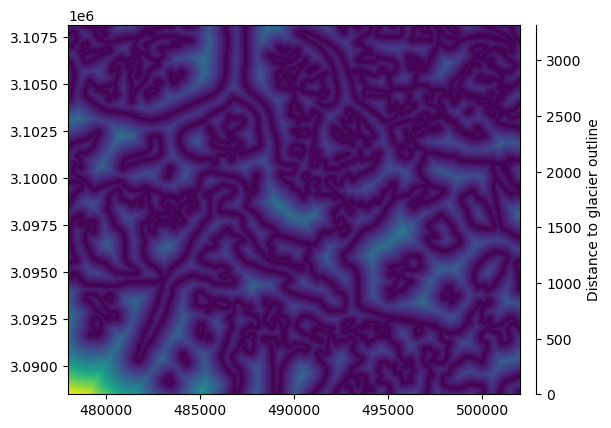

In [6]:
# Plot proximity to vector
rast_proximity_to_vec = vect.proximity(rast)
rast_proximity_to_vec.plot(cbar_title="Distance to glacier outline")
vect.plot(rast_proximity_to_vec, fc="none")

```{tip}
To quickly visualize a raster directly from a terminal, without opening a Python console/notebook, check out our tool `geoviewer.py` in the {ref}`cli` documentation.
```

## Pythonic arithmetic and NumPy interface

All {class}`~geoutils.Raster` objects support Python arithmetic ({func}`+<operator.add>`, {func}`-<operator.sub>`, {func}`/<operator.truediv>`, {func}`//<operator.floordiv>`, {func}`*<operator.mul>`,
{func}`**<operator.pow>`, {func}`%<operator.mod>`) with any other {class}`~geoutils.Raster`, {class}`~numpy.ndarray` or
number. With another {class}`~geoutils.Raster`, the georeferencing must match, while only the shape with a {class}`~numpy.ndarray`.

In [7]:
# Add 1 to the raster array
rast += 1

Additionally, the {class}`~geoutils.Raster` object possesses a NumPy masked-array interface that allows to apply to it any [NumPy universal function](https://numpy.org/doc/stable/reference/ufuncs.html) and
most other NumPy array functions, while logically casting {class}`dtype<numpy.dtype>` and respecting {attr}`~geoutils.Raster.nodata` values.

In [8]:
# Apply a normalization to the raster
import numpy as np
rast = (rast - np.min(rast)) / (np.max(rast) - np.min(rast))

## Casting to {class}`~geoutils.Mask`, indexing and overload

All {class}`~geoutils.Raster` objects also support Python logical comparison operators ({func}`==<operator.eq>`, {func}` != <operator.ne>`, {func}`>=<operator.ge>`, {func}`><operator.gt>`, {func}`<=<operator.le>`,
{func}`<<operator.lt>`), or more complex NumPy logical functions. Those operations automatically casts them into a {class}`~geoutils.Mask`, a boolean raster that inherits all methods from {class}`~geoutils.Raster`.

In [9]:
# Get mask of an AOI: infrared index above 0.6, at least 200 m from glaciers
mask_aoi = np.logical_and(rast > 0.6, rast_proximity_to_vec > 200)

Masks can then be used for indexing a {class}`~geoutils.Raster`, which returns a {class}`~numpy.ma.MaskedArray` of indexed values.

In [10]:
# Index raster with mask to extract a 1-D array
values_aoi = rast[mask_aoi]

Masks also have simplified, overloaded {class}`~geoutils.Raster` methods due to their boolean {class}`dtype<numpy.dtype>`. Using {func}`~geoutils.Raster.polygonize` with a
{class}`~geoutils.Mask` is straightforward, for instance, to retrieve a {class}`~geoutils.Vector` of the area-of-interest:

In [11]:
# Polygonize areas where mask is True
vect_aoi = mask_aoi.polygonize()

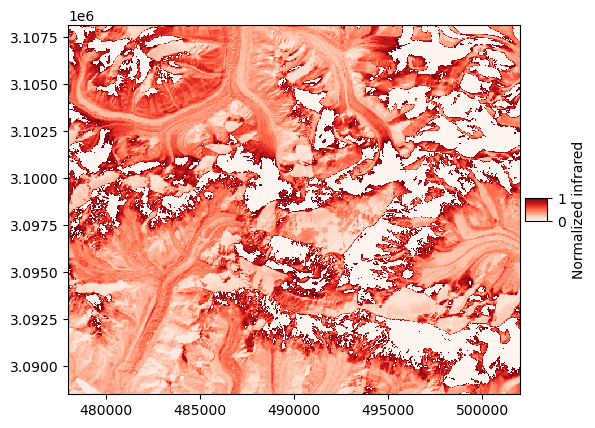

In [12]:
# Plot result
rast.plot(cmap='Reds', cbar_title='Normalized infrared')
vect_aoi.plot(fc='none', ec='k', lw=0.75)

## Saving to file

Finally, for saving a {class}`~geoutils.Raster` or {class}`~geoutils.Vector` to file, simply call the {func}`~geoutils.Raster.save` function.

In [13]:
# Save our AOI vector
vect_aoi.save("myaoi.gpkg")

In [14]:
import os
os.remove("myaoi.gpkg")

## Parsing metadata with {class}`~geoutils.SatelliteImage`

In our case, `rast` would be better opened using the {class}`~geoutils.Raster` object {class}`~geoutils.SatelliteImage` instead, which tentatively parses
metadata recognized from the filename or auxiliary files.

In [15]:
# Name of the image we used
import os
print(os.path.basename(filename_rast))

LE71400412000304SGS00_B4.tif


In [16]:
# Open while parsing metadata
rast = gu.SatelliteImage(filename_rast, silent=False)

From filename: setting satellite as Landsat 7
From filename: setting sensor as ETM+
From filename: setting tile_name as 140041
From filename: setting datetime as 2000-10-30 00:00:00


```{admonition} Wrap-up
In a few lines, we:
 - **easily handled georeferencing** operations on rasters and vectors,
 - performed numerical calculations **inherently respecting invalid data**,
 - **casted to a mask** implicitly from a logical operation on raster, and
 - **vectorized a mask** without need for any additional metadata, simply using the nature of the mask object!

**Our result:** a vector of high infrared absorption indexes at least 200 meters away from glaciers
near Everest, which likely corresponds to **perennial snowfields**.

Otherwise, for more **hands-on** examples, explore GeoUtils' gallery of examples!
```